# Exploratory Data Analysis (EDA)
## Customer Churn Prediction

This notebook explores the Telco Customer Churn dataset to understand patterns, detect data issues, and identify potential predictive signals.

# 1️⃣ Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 2️⃣ Dataset Overview

In [24]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Overview

We first inspect the structure of the dataset, including data types, missing values, and general statistics.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [27]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 3️⃣ Fix Data Types

In [28]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df["SeniorCitizen"].isnull().sum()

np.int64(0)

In [29]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isnull().sum()

np.int64(11)

In [30]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})
df["Churn"].isnull().sum()

np.int64(0)

In [31]:
df.dropna(inplace=True)

`TotalCharges` contained non-numeric values and was converted to numeric. 
Rows with missing values were removed for simplicity.

# 4️⃣ Target Distribution (Class Imbalance)

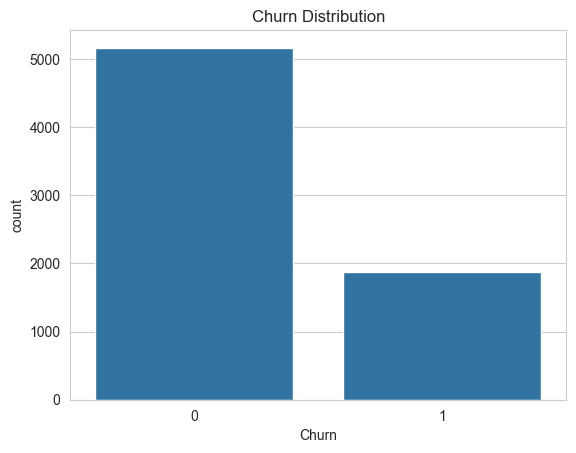

In [32]:
plt.figure()
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

In [33]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

## Target Distribution

The dataset is moderately imbalanced. 
The majority of customers do not churn.

This indicates that accuracy alone may not be a reliable evaluation metric.
We will focus on Recall and ROC-AUC during modeling.

# 5️⃣ Contract Type vs Churn

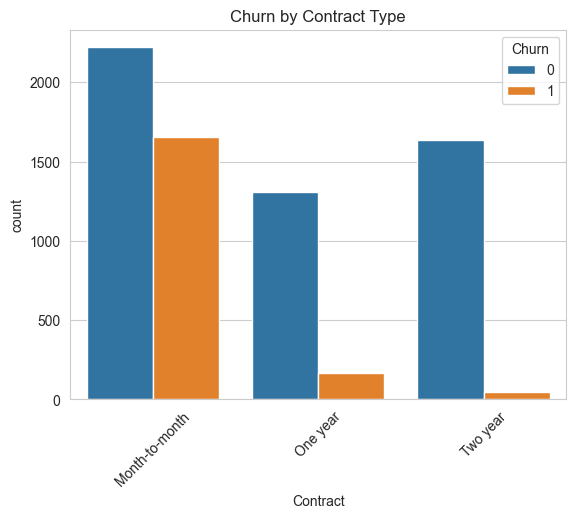

In [34]:
plt.figure()
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

## Contract Type Analysis

Customers with month-to-month contracts exhibit significantly higher churn rates 
compared to customers with one-year or two-year contracts.

This suggests contract duration strongly influences retention.

# 6️⃣ Tenure vs Churn

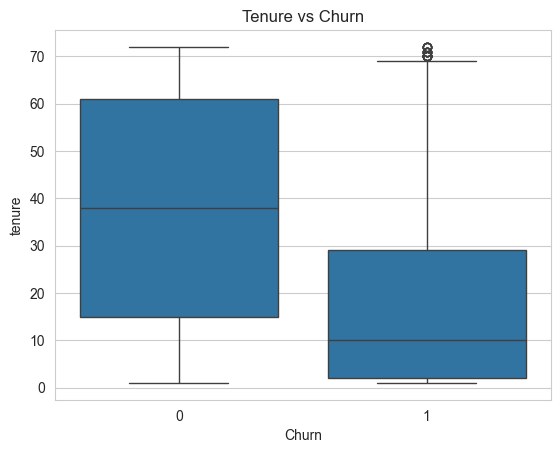

In [35]:
plt.figure()
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

Customers with lower tenure are more likely to churn.

This indicates that the first months of customer lifecycle are critical.

# 7️⃣ Monthly Charges vs Churn

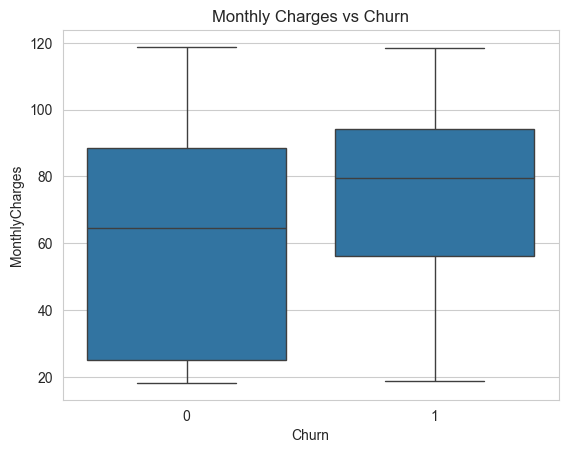

In [36]:
plt.figure()
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Customers with higher monthly charges tend to churn more frequently.

Price sensitivity may play a role in churn behavior.

# 8️⃣ Internet Service vs Churn

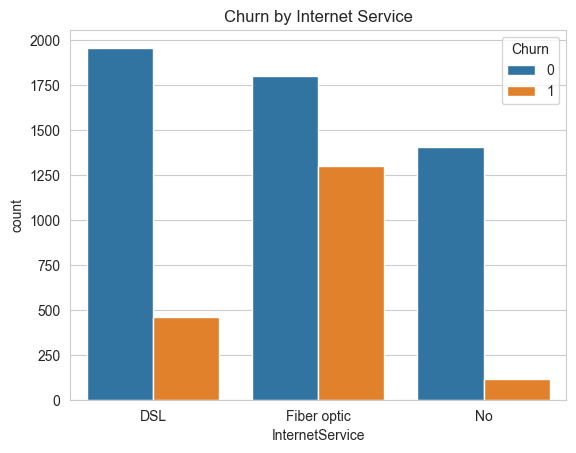

In [37]:
plt.figure()
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service")
plt.show()

Fiber optic users show higher churn rates compared to DSL users.

This may indicate pricing or service quality issues.

# 9️⃣ Correlation Heatmap

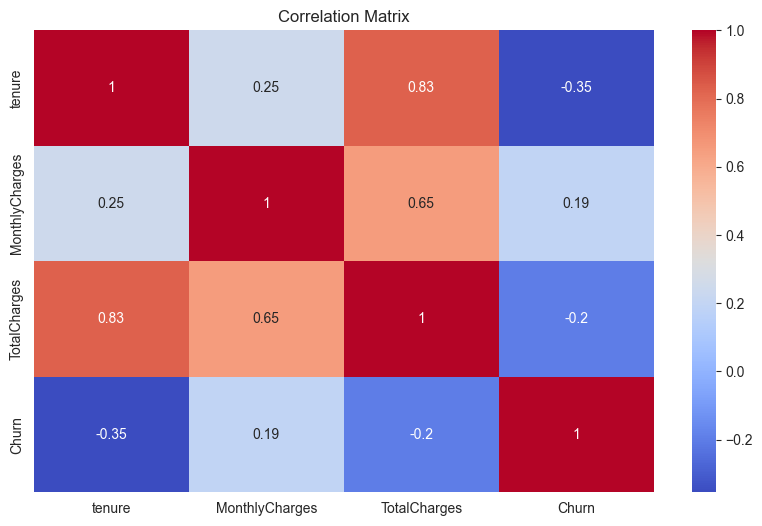

In [38]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Tenure and TotalCharges show strong positive correlation.
MonthlyCharges moderately correlates with churn.

Multicollinearity is not severe but should be monitored.

# 🔟 Final EDA Summary

## EDA Summary

Key findings:

- Churn is moderately imbalanced.
- Month-to-month contracts strongly correlate with churn.
- Lower tenure customers churn more.
- Higher monthly charges increase churn likelihood.
- Fiber optic users churn more than DSL users.

Business implication:

Retention strategies should focus on:
- Early-stage customers
- High monthly charge customers
- Month-to-month contract holders